# Seattle Airbnb data analysis
This notebook is to analyse the Seattle housing data of properties listed on Airbnb
This is part of project 'Write a Data Science Blog Post' for the Data Scientist nano degree
We will be looking at the Seattle housing data got from Kaggle.com

## Business Understanding

As a part of this project we will be looking to answer the following questions regarding the data:

1) What are the most popular property types in Seattle?
2) How does the neighbourhood affect the proprty prices of the most popular properties?
3) What factors affect the price of a property most?

The first step in the analysis is to import the required libraries.

In [1]:
##This notebook is for analyzing the Airbnb data for Seattle
##This is part of project 'Write a Data Science Blog Post' for the nano degree Data Scientist
##Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Understanding

We read the csv file
Have a look at the data

In [2]:
##Read the file
df = pd.read_csv('./listings.csv')

In [3]:
##Look at the data
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.016010e+13,4/01/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.016010e+13,4/01/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.016010e+13,4/01/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.016010e+13,4/01/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.016010e+13,4/01/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
##Number od rows and columns in the data set
print(df.shape)

(3818, 92)


# Data Modelling

## Question 1
## What are the most popular property types in Seattle?

Analysis and Visualization:

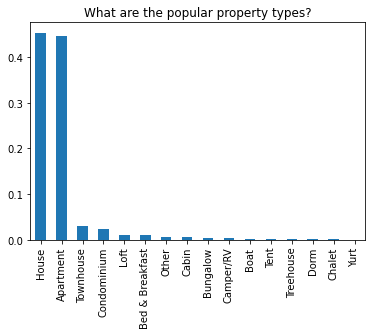

In [6]:
##1.What are the most popular property types in Seattle?
property_vals = df.property_type.value_counts()#Provide a pandas series of the counts for each Property type

# The below should be a bar chart of the proportion of property types in Seattle

(property_vals/df.shape[0]).plot(kind="bar");
plt.title("What are the popular property types?");


The bar chart above indicates that House and Apartment are the most popular property types in Seattle. Dorm, Chalet and Yurt are the least popular property types in Seattle. This can help property owners if they decide to list their property on Airbnb.

## Question 2
## How does the neighbourhood affect the proprty prices for similar properties?

Analysis:

In [4]:
##2.Does the neighbourhood affect the proprty prices for similar properties?
##For this first we look at the most popular property_type along with the number of bedrooms.
pd.DataFrame(df.query("property_type == 'House' or property_type == 'Apartment'")).groupby(['property_type', 'bedrooms']).count()

id  listing_url  scrape_id  last_scraped  name  \
property_type bedrooms                                                     
Apartment     0.0        277          277        277           277   277   
              1.0       1114         1114       1114          1114  1114   
              2.0        294          294        294           294   294   
              3.0         17           17         17            17    17   
              4.0          2            2          2             2     2   
House         0.0         53           53         53            53    53   
              1.0       1046         1046       1046          1046  1046   
              2.0        291          291        291           291   291   
              3.0        248          248        248           248   248   
              4.0         63           63         63            63    63   
              5.0         24           24         24            24    24   
              6.0          6            6          6             6     6   
              7.0          1            1          1             1     1   

                        summary  space  description  experiences_offered  \
property_type bedrooms                                                     
Apartment     0.0           277    226          277                  277   
              1.0          1076    896         1114                 1114   
              2.0           276    260          294                  294   
              3.0            16     16           17                   17   
              4.0             2      2            2                    2   
House         0.0            52     47           53                   53   
              1.0           968    912         1046                 1046   
              2.0           278    262          291                  291   
              3.0           228    226          248                  248   
              4.0            62     55           63                   63   
              5.0            24     17           24                   24   
              6.0             5      6            6                    6   
              7.0             1      1            1                    1   

                        neighborhood_overview  ...  review_scores_value  \
property_type bedrooms                         ...                        
Apartment     0.0                         211  ...                  224   
              1.0                         771  ...                  928   
              2.0                         220  ...                  253   
              3.0                          13  ...                   14   
              4.0                           2  ...                    2   
House         0.0                          43  ...                   49   
              1.0                         759  ...                  883   
              2.0                         227  ...                  240   
              3.0                         182  ...                  209   
              4.0                          52  ...                   49   
              5.0                          15  ...                   17   
              6.0                           5  ...                    6   
              7.0                           1  ...                    1   

                        requires_license  license  jurisdiction_names  \
property_type bedrooms                                                  
Apartment     0.0                    277        0                 277   
              1.0                   1114        0                1114   
              2.0                    294        0                 294   
              3.0                     17        0                  17   
              4.0                      2        0                   2   
House         0.0                     53        0                  53   
              1.0                 

The above table gives the most popular property type in Seattle which is 1 Bedroom Apartment.
Next we create a function to filter properties.

First use th function to filter the dataframe for just Apartments. We also drop the rows with missing values.

In [27]:
##We can see 1 bedroom Apartments are the most popular property types in Seattle which are listed in Airbnb
##Create a new data frame with data for 1 bedroom apartments

def filter_property(df, column_filter, property_type, columns):
    ''' Filter a dataframe by property_type.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == property_type].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by Apartment and create new dataframe aptdf
aptdf = filter_property(df, 'property_type', 'Apartment', ['property_type'])

In [28]:
##Check the number of rows and columns in the new data frame
print(aptdf.shape)

(1708, 92)


Use the same function to filter for Apartments with 1 Bedroom

In [36]:
newdf = filter_property(aptdf, 'bedrooms', 1, ['bedrooms'])

In [37]:
print(newdf.shape)

(1114, 92)


In [38]:
newdf.groupby('neighbourhood').count().sort_values('id')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
neighbourhood,,,,,,,,,,,,,,,,,,,,,
Cedar Park,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
Wedgewood,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,0
Gatewood,1,1,1,1,1,1,0,1,1,0,...,0,1,0,1,1,1,1,1,1,0
Licton Springs,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,0
Haller Lake,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fremont,53,53,53,53,53,53,45,53,53,41,...,40,53,0,53,53,53,53,53,53,42
First Hill,60,60,60,60,60,59,49,60,60,40,...,53,60,0,60,60,60,60,60,60,53
Queen Anne,63,63,63,63,63,62,52,63,63,49,...,57,63,0,63,63,63,63,63,63,57


For the newly created dataframe get the mean prices for each neighborhood

In [11]:
newdf.groupby('neighbourhood')['price'].mean().sort_values()

neighbourhood
South Delridge                48.000000
Brighton                      57.500000
Laurelhurst                   60.000000
Bitter Lake                   62.000000
Wedgewood                     65.000000
                                ...    
Magnolia                     147.400000
Pike Place Market            150.777778
Pioneer Square               155.250000
Central Business District    156.863636
High Point                   300.000000
Name: price, Length: 65, dtype: float64

The above table gives a visual representation of the neighborhoods in Seattle which are most pricey and the neighborhoods that are least pricey.

We can see that High Point, Central Business District, Pioneer Square are the most Pricey neighborhoods and South Delridge, Brighton and Laurelhurst are the least pricey neighborhoods.

## Question 3
## What factors affect the price of a property the most?

Analyze:

<AxesSubplot:>

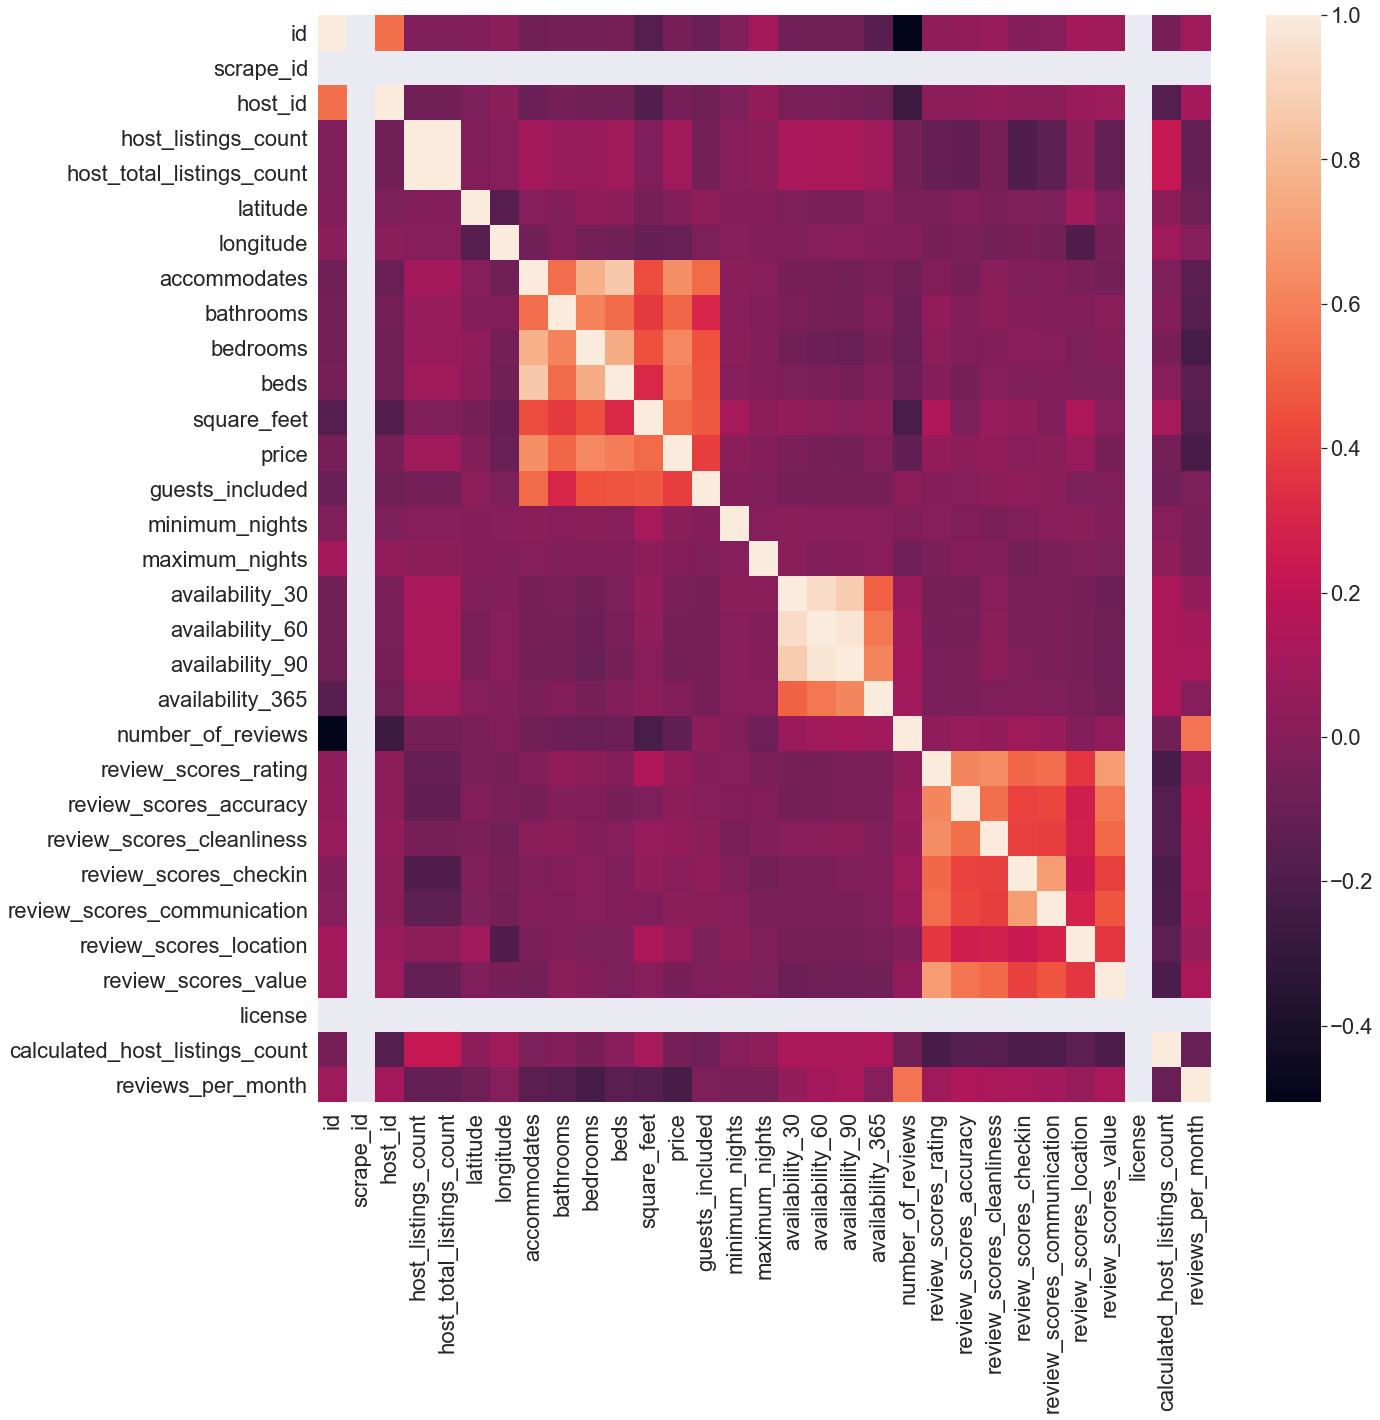

In [12]:
##3.What factors affect the price of a property the most?
##First we will look at heatmap
plt.figure(figsize=(20, 20))
corr = df.corr()
sns.set(font_scale=2.0)
sns.heatmap(corr)

The heatmap above is very difficult to understand.

We take a look below at the co-relation of the different factors with the price of the property.

In [13]:
corr['price'].sort_values(ascending=False)

price                             1.000000
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
bathrooms                         0.516424
guests_included                   0.392875
host_listings_count               0.093962
host_total_listings_count         0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
latitude                         -0.008904
availability_365                 -0.015550
availability_30                  -0.037653
review_scores_value              -0.041776
id                               -0.046289
availability_60                  -0.049336
host_id    

From the above table we can see that the factors which affect the price of a property the most are: accommodates, bedrooms, beds, square_feet and bathrooms